In [ ]:
import pandas as pd
import numpy as np

from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, \
    concatenate
from sklearn.metrics import f1_score, accuracy_score

In [2]:
df_train = pd.read_csv("mitbih_train.csv", header=None)
df_train = df_train.sample(frac=1)
df_test = pd.read_csv("mitbih_test.csv", header=None)

Y = np.array(df_train[187].values).astype(np.int8)
X = np.array(df_train[list(range(187))].values)[..., np.newaxis]

Y_test = np.array(df_test[187].values).astype(np.int8)
X_test = np.array(df_test[list(range(187))].values)[..., np.newaxis]

In [5]:
def get_model():
    nclass = 5
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.softmax, name="dense_3_mitbih")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model

In [6]:
model = get_model()
file_path = "baseline_cnn_mitbih.x"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

model.fit(X, Y, epochs=10, verbose=5, callbacks=callbacks_list, validation_split=0.1)
model.load_weights(file_path)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 187, 1)]          0         
                                                                 
 conv1d_8 (Conv1D)           (None, 183, 16)           96        
                                                                 
 conv1d_9 (Conv1D)           (None, 179, 16)           1296      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 89, 16)            0         
 g1D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 89, 16)            0         
                                                                 
 conv1d_10 (Conv1D)          (None, 87, 32)            1568      
                                                             

2024-11-20 06:42:02.971867: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-11-20 06:42:03.825005: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5622b5b43c90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-20 06:42:03.825093: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-11-20 06:42:03.844260: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-20 06:42:04.040161: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_acc improved from -inf to 0.93444, saving model to baseline_cnn_mitbih.x
INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


Epoch 2/100

Epoch 2: val_acc improved from 0.93444 to 0.95934, saving model to baseline_cnn_mitbih.x
INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


Epoch 3/100

Epoch 3: val_acc improved from 0.95934 to 0.96905, saving model to baseline_cnn_mitbih.x
INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


Epoch 4/100

Epoch 4: val_acc improved from 0.96905 to 0.97259, saving model to baseline_cnn_mitbih.x
INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


Epoch 5/100

Epoch 5: val_acc did not improve from 0.97259
Epoch 6/100

Epoch 6: val_acc improved from 0.97259 to 0.97499, saving model to baseline_cnn_mitbih.x
INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


Epoch 7/100

Epoch 7: val_acc improved from 0.97499 to 0.97944, saving model to baseline_cnn_mitbih.x
INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


Epoch 8/100

Epoch 8: val_acc did not improve from 0.97944
Epoch 9/100

Epoch 9: val_acc improved from 0.97944 to 0.97967, saving model to baseline_cnn_mitbih.x
INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


Epoch 10/100

Epoch 10: val_acc improved from 0.97967 to 0.98333, saving model to baseline_cnn_mitbih.x
INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


Epoch 11/100

Epoch 11: val_acc improved from 0.98333 to 0.98344, saving model to baseline_cnn_mitbih.x
INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


Epoch 12/100

Epoch 16: val_acc did not improve from 0.98538
Epoch 17/100

Epoch 17: val_acc did not improve from 0.98538
Epoch 18/100

Epoch 18: val_acc improved from 0.98538 to 0.98607, saving model to baseline_cnn_mitbih.x
INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


Epoch 19/100

Epoch 23: val_acc improved from 0.98664 to 0.98698, saving model to baseline_cnn_mitbih.x
INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


Epoch 24/100

Epoch 24: val_acc did not improve from 0.98698
Epoch 25/100

Epoch 25: val_acc did not improve from 0.98698
Epoch 26/100

Epoch 26: val_acc did not improve from 0.98698

Epoch 26: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 27/100

Epoch 27: val_acc improved from 0.98698 to 0.98881, saving model to baseline_cnn_mitbih.x
INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


INFO:tensorflow:Assets written to: baseline_cnn_mitbih.x/assets


Epoch 28/100

Epoch 31: val_acc did not improve from 0.98881
Epoch 32/100

Epoch 32: val_acc did not improve from 0.98881
Epoch 32: early stopping


2024-11-20 07:00:26.552306: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open baseline_cnn_mitbih.x: DATA_LOSS: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


In [13]:
pred_test = model.predict(X_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(Y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

685/685 [==============================] - 4s 5ms/step
Test f1 score : 0.9174768318075499 
Test accuracy score : 0.9854284670199159 


In [14]:
! pip install --no-cache-dir grad-cam

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 8.8 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.4-py3-none-any.whl size=39588 sha256=90de284538bf291be40d1f59bf59ef8bb7c7fda7be2447f83ef88f643533ce89
  Stored in directory: /tmp/pip-ephem-wheel-cache-pcl5z3t_/wheels/df/fc/80/a9734b773e25e18fff0762007a04fd1153e52f265e6b912e2c
Successfully built grad-cam


In [20]:
model.layers[-5]

In [25]:
import tensorflow as tf
def reset_tf_session():
    """Clears the TensorFlow session and graph to avoid variable reuse issues."""
    tf.keras.backend.clear_session()
    tf.compat.v1.reset_default_graph()

# reset_tf_session()

In [35]:
reset_tf_session()

In [36]:
import keras
import tensorflow as tf
grad_model = keras.models.Model(
        model.inputs, [model.get_layer('conv1d_15').output, model.output]
    )

In [69]:
pred_index = None
with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(np.array([X_test[0]]))
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

In [70]:
grads = tape.gradient(class_channel, last_conv_layer_output)

In [71]:
grads

<tf.Tensor: shape=(1, 15, 256), dtype=float32, numpy=
array([[[ 3.8206722e-06,  0.0000000e+00, -3.0422807e-08, ...,
         -0.0000000e+00,  8.6786081e-08,  1.3684684e-07],
        [ 0.0000000e+00,  0.0000000e+00, -3.0422807e-08, ...,
         -0.0000000e+00,  8.6786081e-08,  1.3684684e-07],
        [ 0.0000000e+00,  0.0000000e+00, -3.0422807e-08, ...,
         -0.0000000e+00,  8.6786081e-08,  1.3684684e-07],
        ...,
        [ 0.0000000e+00,  0.0000000e+00, -3.0422807e-08, ...,
         -0.0000000e+00,  8.6786081e-08,  1.3684684e-07],
        [ 0.0000000e+00,  0.0000000e+00, -3.0422807e-08, ...,
         -0.0000000e+00,  8.6786081e-08,  1.3684684e-07],
        [ 0.0000000e+00,  3.5139419e-06, -3.0422807e-08, ...,
         -0.0000000e+00,  8.6786081e-08,  1.3684684e-07]]], dtype=float32)>

In [81]:
pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
pooled_grads

<tf.Tensor: shape=(256,), dtype=float32, numpy=
array([ 2.54711466e-07,  2.34262799e-07, -3.04228038e-08, -1.83594054e-07,
       -4.59601566e-08, -7.32743615e-07,  2.49191814e-08, -2.08614974e-08,
        2.63464717e-08, -1.57179329e-07,  2.68232242e-07, -1.51662993e-09,
        8.57603979e-08,  2.08505540e-07,  1.39860560e-07, -8.44679278e-08,
        9.93112614e-09, -4.95872285e-08, -9.71824718e-08, -2.28189649e-07,
        6.58901342e-08,  2.62415512e-07, -2.41772593e-08, -6.76721479e-09,
       -8.43691481e-08,  3.92357151e-08, -1.81301672e-07,  1.99568163e-07,
        1.03927293e-08, -1.25934427e-08, -2.25237056e-08,  9.34824040e-09,
        2.75266832e-08, -2.05984620e-07, -9.04258624e-09,  2.75550729e-08,
        1.26805872e-07, -1.65836724e-07,  3.60927821e-08,  1.39970282e-07,
       -9.64876623e-10,  1.07277041e-08, -6.50897647e-08, -3.78468002e-07,
        1.60437580e-07,  2.84290451e-07,  3.41342201e-07, -6.25155181e-08,
        6.42574420e-08, -2.76821510e-07,  1.87377680

In [74]:
last_conv_layer_output = last_conv_layer_output[0]

<tf.Tensor: shape=(15, 256), dtype=float32, numpy=
array([[5.014629  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06733611, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.71259856, 0.        ,
        0.        ],
       ...,
       [0.        , 0.32896602, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.7714306 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 3.504332  , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)>

In [82]:
heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

In [83]:
heatmap.shape

TensorShape([15])

In [84]:
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

In [85]:
heatmap.shape

TensorShape([15])

In [86]:
heatmap

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([1.        , 0.07711695, 0.01491676, 0.06016807, 0.10389279,
       0.03739358, 0.        , 0.069328  , 0.34284425, 0.19127893,
       0.01323316, 0.00665802, 0.00786345, 0.14944726, 0.26384768],
      dtype=float32)>

In [105]:
def make_gradcam_heatmap_1d(array_1d, model, last_conv_layer_name, pred_index=None):
    # Create a model mapping the input 1D array to the activations of the last conv layer
    # and the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the top predicted class with respect to the activations
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(array_1d)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Compute gradients of the class channel with respect to the feature map
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Compute channel-wise mean of the gradients (only over the channel axis)
    pooled_grads = tf.reduce_mean(grads, axis=0)

    # Multiply each channel by the corresponding pooled gradient value
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = tf.reduce_sum(last_conv_layer_output * pooled_grads, axis=-1)

    # Normalize the heatmap to the range [0, 1]
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

res = make_gradcam_heatmap_1d(np.array([X_test[6]]), model, 'conv1d_15')

In [90]:
res.shape

(15,)

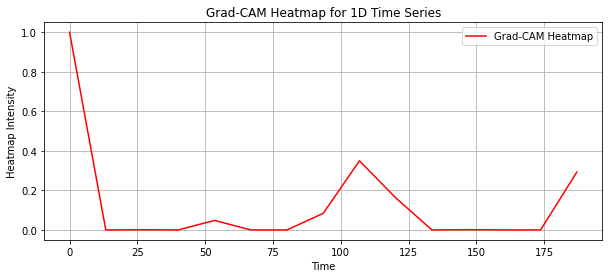

In [91]:
import matplotlib.pyplot as plt
res = (res - np.min(res)) / (np.max(res) - np.min(res))

# Create a time axis for the heatmap
time_axis = np.linspace(0, 187, len(res))

# Plot the heatmap as a time series
plt.figure(figsize=(10, 4))
plt.plot(time_axis, res, label="Grad-CAM Heatmap", color="red")
plt.title("Grad-CAM Heatmap for 1D Time Series")
plt.xlabel("Time")
plt.ylabel("Heatmap Intensity")
plt.grid(True)
plt.legend()

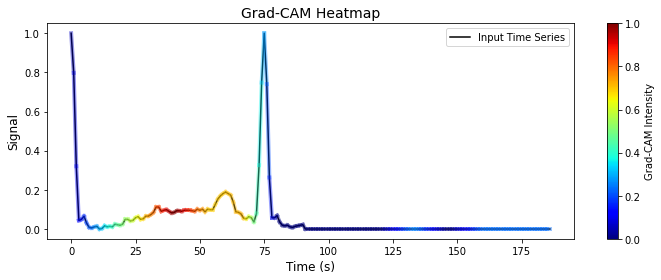

In [106]:
import matplotlib.pyplot as plt
import numpy as np

def save_and_display_gradcam_timeseries(input_series, heatmap):
    # Ensure heatmap is normalized between 0 and 1
    heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))
    heatmap_interpolated = np.interp(np.linspace(0, len(heatmap)-1, len(input_series)),
                                     np.arange(len(heatmap)), heatmap)

    cmap = plt.cm.jet
    heatmap_colors = cmap(heatmap_interpolated)

    fig, ax = plt.subplots(figsize=(10, 4))

    ax.plot(input_series, color="black", label="Input Time Series", linewidth=1.5)

    # Overlay the heatmap as a background
    for i in range(len(input_series) - 1):
        ax.plot(
            [i, i + 1],
            [input_series[i], input_series[i + 1]],
            color=heatmap_colors[i],
            alpha=0.4,
            linewidth=4,
        )

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
    cbar = plt.colorbar(sm, ax=ax, orientation="vertical")
    cbar.set_label("Grad-CAM Intensity", fontsize=10)

    ax.set_title("Grad-CAM Heatmap", fontsize=14)
    ax.set_xlabel("Time (s)", fontsize=12)
    ax.set_ylabel("Signal", fontsize=12)
    ax.legend()

    # Save the plot
    plt.tight_layout()
#     plt.savefig(save_path)

    # Display the plot
    plt.show()

# Example usage
# input_series = np.sin(np.linspace(0, 10, 187))  # Example time series
# heatmap = np.random.rand(187)  # Example Grad-CAM heatmap
save_and_display_gradcam_timeseries(X_test[6], res)
